<a href="https://colab.research.google.com/github/aaugustine130/AdvLinearAlgebra/blob/master/Copy_of_Project_4_Case_3_An_Interesting_Case_using_Singular_Values_and_Best_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#  Libraries that we'll need:
import numpy as np
import sympy as sym
#from scipy import misc
from scipy import linalg
#from PIL import Image
#import imageio
import matplotlib.pyplot as plt
# importing "random" for random operations 
import random 

#  Singular Value Decomposition and Best Fit

We look at some data generated here from three sources:

*   Case 0:  A known polynomial function $f(x) = 4 - 3x^2 + 5x^6$
*   Case 1:  A known trigonometric function $f(x) = 4 - 2\cos(x) + \cos^2 (x)$
*   Case 2:  A matrix of data $M$ (specified below) with unknown source function
*   Case 3:  An interesting case.

# Overview for Case 3:  An interesting case:

For Case 3, you have the option of completing one of the following tasks:

* **Option A:**  Re-do Case 0 or Case 1 by adding noise to the function.

Using $f$ + (2*random.random()-1)  will add a random number between -1 and 1 to the value of $f$.  How much noise can your method absorb and still produce accurate results?  (e.g. noise with a range of $-1$ to $1$?  noise from a range of $-5$ to $5$?  noise from $-30$ to $30$?)  Which method (best-fit or SVD) accommodates a larger range of error?

* **Option B:**  Best Fit for a plane

Instead of matching a function $x \to f(x)$ using a 8th degree polynomial, make a multivariable function $(x_1,x_2) \to f(x_1,x_2)$ where $f$ is a 3rd degree polynomial in $x_1$ and $x_2$. Generate data based on at least 16 different input points. Modify the procedure for choosing the $M$ matrix, and use Best Fit to find the best fit line. 


BONUS for Option B:  Do this for 3 dimensions, with noise, or modify the SVD solution to fit this option

* **Option C:**  The space of continuous functions of one variable has two different bases:


Given an unknown function, we figured out how to write it using basis of polynomials.  We could also have determined how to write it as a basis of powers of sine and cosine functions. Fit the polynomial $f(x) = 4 - 3x^2 + 5x^6$ to a basis of sine & cosine functions of at most power 4. Plot the original function and the best-fit function.

BONUS for Option C:  Include noise via $f(x)$ + (2*random.random()-1), and find a way to measure the error in your approximation to the function f(x).  What is the effect of this noise on your approximation?


In each case, it may be helpful to re-use data from the previous cases by copy-and-paste into cells below.  Be sure to specify which option you are addressing.

#3.1 Code for Option A: Adding noise to Case 0

In [0]:
#We'll generate random points of data for our system.
#The actual points for the system will be stored in containers actual_data_x and actual_data_y

actual_data_x = []
actual_data_y = []
noise_data_y = []

#We'll use (cough... cough...) three   data points:
for i in range(15):
    # pick a random number between -5 and 5
    x = 6*random.random() - 3
    f = 4 - 3*x**2 + 5*x**6
    noise = f + (60*random.random() - 30)
    actual_data_x.append(x)
    actual_data_y.append(f)
    noise_data_y.append(noise)

In [159]:
actual_data_x[:5]

[0.7839409612560955,
 -0.8733561190698835,
 -1.8871822374557625,
 -0.4733398542581049,
 0.5636006141750407]

In [160]:
actual_data_y[:5]

[3.3168765194433663,
 3.9305475319991214,
 219.18276595890924,
 3.3840833725745556,
 3.2073133059597043]

In [161]:
noise_data_y[:5]

[30.880609509045133,
 -24.526423859801266,
 226.17054792492803,
 -15.04206668125116,
 -0.7708693652348022]

In [0]:
#Create the matrix M from the data in actual_data_x
M_entries = []

for x in actual_data_x:
  M_entries.append([1, x, x**2, x**3, x**4, x**5, x**6])

M = []
M = np.matrix(M_entries)


#Use the noisy data for b now instead of the actual y:
b = []
b = (np.matrix(noise_data_y)).transpose()

In [163]:
#  Find the solution to Mx = b using Best Fit:
#  (We've already used 'x' as a variable, so we'll call the solution vector c.)
c = linalg.inv(M.transpose() * M) * M.transpose() * b
c

matrix([[ -3.11879136],
        [ 31.501369  ],
        [  3.62676071],
        [-20.34274305],
        [ -5.01793965],
        [  2.7348813 ],
        [  5.7776522 ]])

In [164]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*c).transpose() * (b-M*c))[0,0]
error**0.5

45.086301378489196

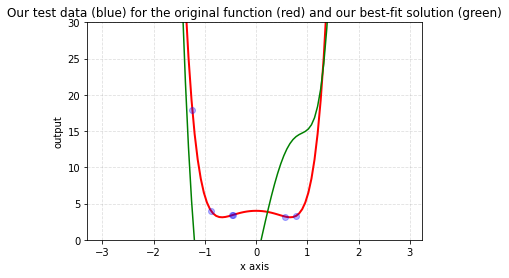

In [165]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

best_fit = c[0,0] + c[1,0]*xdata + c[2,0]*(xdata**2) + c[3,0]*(xdata**3) + c[4,0]*(xdata**4) + c[5,0]*(xdata**5) + c[6,0]*(xdata**6)
# Create the actual plot in red, and our datapoints in blue,
# and the best-fit method in green:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3)+plt.plot(xdata,best_fit, color='green')

#Restrict the output values to this range:
plt.ylim(-0,30)

# Add a title
plt.title('Our test data (blue) for the original function (red) and our best-fit solution (green)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

In [0]:
#  For this method, we use SVD on the data matrix M:
U, S, Vh = linalg.svd(M, full_matrices=True)

Vh = Vh.T

In [167]:
U

array([[-2.10261439e-04, -8.00495273e-03, -1.71164987e-02,
        -2.83089054e-01,  2.77056962e-01, -4.50667574e-01,
         3.22927508e-01,  2.68964792e-01, -2.68267667e-01,
        -4.43840263e-01, -8.17552626e-02, -2.42011423e-01,
         7.75074606e-02,  2.38644618e-01, -2.56600076e-01],
       [-9.19484229e-04,  5.97832121e-03, -5.00723250e-02,
         1.15267580e-01,  4.27585396e-01,  1.65224541e-01,
        -2.22717875e-01, -4.48458565e-01, -1.31110612e-01,
         8.89793344e-02, -3.36768958e-01, -1.98030447e-01,
        -3.16782634e-01,  4.90964466e-01, -6.47206117e-02],
       [-6.94134459e-02,  1.17313845e-01, -4.04095790e-01,
         7.82093060e-02,  2.56165917e-02,  1.82906926e-02,
         1.33100490e-01, -3.99911566e-01, -2.98425421e-01,
         8.93312532e-02, -1.06356806e-01, -2.70236225e-01,
         2.62111946e-01, -5.42538413e-01, -2.98237452e-01],
       [-4.73316265e-05,  6.24957342e-04, -1.40898152e-02,
         2.81364969e-02,  3.63576557e-01, -1.22099905

In [168]:
S

array([746.66776019,  70.682249  ,  22.386241  ,   3.83225327,
         2.79376233,   0.93990779,   0.76768455])

In [169]:
Vh

array([[-0.002054  , -0.01005273, -0.11129783, -0.17603306,  0.82027417,
        -0.45662333, -0.2741629 ],
       [ 0.00473563, -0.05544321,  0.11502119, -0.56449216, -0.24194437,
        -0.56539608,  0.53554883],
       [-0.01451091, -0.03488292, -0.33781775, -0.19854433,  0.4172196 ,
         0.53872745,  0.61703523],
       [ 0.03776658, -0.21845654,  0.29841024, -0.71733019, -0.02713164,
         0.41208447, -0.4203444 ],
       [-0.11363575, -0.11524646, -0.86932329, -0.21013739, -0.30351286,
        -0.08538302, -0.27297279],
       [ 0.31560961, -0.91821013,  0.00424498,  0.21749306,  0.02316546,
        -0.06677406,  0.07045613],
       [-0.9411769 , -0.30247864,  0.12438813,  0.0701253 ,  0.03388486,
        -0.00570135,  0.03349708]])

In [170]:
# We can compare the original matrix M to the matrix reconstructed (called a1) from the SVD:
# If they are close, then allclose(M, a1) should be True.

#First, recast S as a matrix instead of a vector:
sigma = np.zeros((U.shape[1], Vh.shape[0]))
for i in range(min(sigma.shape)):
     sigma[i, i] = S[i]
#Reconstruct the matrix:
a1 = np.dot(U, np.dot(sigma, Vh.T))

#does a1 approximate M?
np.allclose(M, a1)

True

In [0]:
#  Based on the number of non-zero singular values in S, divide each of U, sigma, and Vh into 
#  U_use, Sigma_use, and Vh_use.
#  and  discard U_d, Sigma_d, Vh_d
useSigs = 7

#Use these parts of U, S, and Vh
(Vrows, Vcols) = Vh.shape
(Urows, Ucols) = U.shape
U_use = U[:Urows, :useSigs]
Vh_use = Vh[:Vrows, :useSigs]
sigma_use = sigma[:useSigs, :useSigs]

#discard these parts of U, S, and Vh:
U_d = U[:Urows, useSigs:]
Vh_d = Vh[:Vrows, useSigs:]
sigma_d = sigma[useSigs:, useSigs:]

In [172]:
#  If we use Singular Value Decomposition to break down M as a product of matrices
#  M = U sigma Vh.conjugate_transpose()
#  Then the part of A which corresponds to non-zero singular values is:
#  M_use = U_use sigma_use Vh_use.conjugate_transpose()
#
#  So, the equation Mx = b becomes:  (U_use sigma_use Vh_use.conjugate_transpose()) x = b
#  or
#  svd_sol = (U_use sigma_use Vh_use.conjugate_transpose()).inverse() b
#  or
#  svd_sol = Vh_use * Sigma_use.inverse() * U_use.transpose() * b
#  (since Vh_use.conjugate_transpose() = Vh_use.inverse() and U_use.transpose() = U_use.inverse() )
svdsol = (Vh_use @ linalg.inv(sigma_use) @ U_use.transpose()) @ b
svdsol

matrix([[ -3.11879136],
        [ 31.501369  ],
        [  3.62676071],
        [-20.34274305],
        [ -5.01793965],
        [  2.7348813 ],
        [  5.7776522 ]])

In [173]:
#  Let's see how close this actually gets us by comparing the original b vector to the result of Mc:
error = ((b-M*svdsol).transpose() * (b-M*svdsol))[0,0]
error**0.5

45.0863013784892

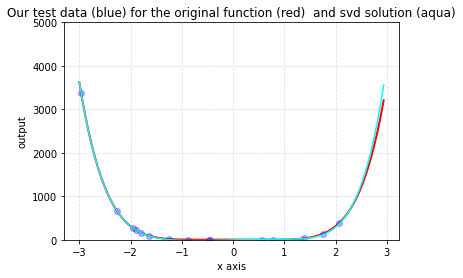

In [174]:
#Show a plot of the solutions using the best-fit method, and the SVD method:

# We'll specify that x is a variable:
x = sym.symbols('x')

xdata = []
fdata = []
#set up our 100 data points on the interval from (-3, 3):
xdata = np.array(range(100))/(100/6) - 3
# find the ouput for our function on each data point:
fdata = 4 - 3*xdata**2 + 5*xdata**6

#construct the solution from svdsol
svd_fit = svdsol[0,0] + svdsol[1,0]*xdata + svdsol[2,0]*(xdata**2) + svdsol[3,0]*(xdata**3) + svdsol[4,0]*(xdata**4) + svdsol[5,0]*(xdata**5) + svdsol[6,0]*(xdata**6)
# Create the actual plot in red, and our datapoints in blue,
# and the svd solution in aqua:  
plt.plot(xdata,fdata, color='red', linewidth=2 ) + plt.plot(actual_data_x, actual_data_y, 'bo', alpha=0.3) + plt.plot(xdata, svd_fit, 'aqua')

#Restrict the output values to this range:
plt.ylim(-0,5000)
# Add a title
plt.title('Our test data (blue) for the original function (red)  and svd solution (aqua)')

# Add X and y Label
plt.xlabel('x axis')
plt.ylabel('output')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

#3.2 Report of Findings

My initial process was very similar to the examples we worked through in Case 0 and 1.  I utilized much of the same code, except instead of only having the actual_data_x and actual_data_y variables, I created a new variable called noise_data_y, which was the actual y data with added random noise.  I tried out different amounts of added noise, starting with just +/- 1 to the actual data.  I continued to try adding more and more noise to the y-values to try and determine now much noise could be added to still produce accurate results.  Both the method of best fit and the SVD method were used.

Starting with added noise of +/- 1, both the SVD method and the method of best fit retain farily accurate results, with total errors being around 1.8 for both methods when using 15 points.  When the total points are increased, the error actually increases now with the added noise, which is interesting because before when there was no noise, adding points was an easy way to decrease the error in the fits.

By adding noise of up to +/- 5, the error stays relatively small at around 7; however, if you look at the graph of the function zoomed in, you can see that the best fit and SVD lines are not accurately hitting the points, and the noise is causing the fit to no longer match the function accurately.  By adding more points, the error increases again, but the function mirrors the original function better, just shifted up or down depending on the random noise.

Increasing the potential error up to +/- 30, the error jumps to around 47, and we definitely no longer have accurate results.  If you zoom out to where you can see all the points, the function still looks similar, but as you zoom in, you can see that the fits no longer match the original function.  Adding more points here does not help, since the noise is too great, causing the fits to no longer accurately match the original points.

Overall both the SVD method and the method of best fit perform about the same.  The best results for the SVD method always seem to come when using the maximum number of SV's, which produces the same results as the method of best fit.  However, using fewer than the maximum number of SV's only increases the error slightly, so you may be able to get away with using fewer SV's.  Both methods seemed to be able to deal with small noise errors of less than 5; however, as the noise additions increased further than 5-10, the methods were no longer accurately matching the original function, especially when using only 10-20 points.